### Project - MovieLens Data Analysis

The GroupLens Research Project is a research group in the Department of Computer Science and Engineering at the University of Minnesota. The data is widely used for collaborative filtering and other filtering solutions. However, we will be using this data to act as a means to demonstrate our skill in using Python to “play” with data.

#### Domain 
Internet and Entertainment

**Note that the project will need you to apply the concepts of groupby and merging extensively.**

#### 1. Import the necessary packages - 2.5 marks

In [122]:
import pandas as pd
import seaborn as sns   # Why sns?  It's a reference to The West Wing
import matplotlib.pyplot as plt  # seaborn is based on matplotlib
sns.set(color_codes=True) # adds a nice background to the graphs
%matplotlib inline 
# tells python to actually display the graphs


#### 2. Read the 3 datasets into dataframes - 2.5 marks

In [123]:
df_user = pd.read_csv('user.csv')
df_item = pd.read_csv('item.csv')
df_data = pd.read_csv('Data.csv')

#### 3. Apply info, shape, describe, and find the number of missing values in the data - 5 marks

In [124]:
df_data.head()

,user id,movie id,rating,timestamp
0,196,242,3,881250949
1,186,302,3,891717742
2,22,377,1,878887116
3,244,51,2,880606923
4,166,346,1,886397596


In [125]:
df_user.info()
df_user.shape
df_user.describe()
df_user.isnull().sum() # There are no missing values in user data set

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 943 entries, 0 to 942
Data columns (total 5 columns):
user id       943 non-null int64
age           943 non-null int64
gender        943 non-null object
occupation    943 non-null object
zip code      943 non-null object
dtypes: int64(2), object(3)
memory usage: 36.9+ KB


user id       0
age           0
gender        0
occupation    0
zip code      0
dtype: int64

In [126]:
df_item.info()
df_item.shape
df_item.describe()
df_item.isnull().sum() # There are no missing values in item data set

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1681 entries, 0 to 1680
Data columns (total 22 columns):
movie id        1681 non-null int64
movie title     1681 non-null object
release date    1681 non-null object
unknown         1681 non-null int64
Action          1681 non-null int64
Adventure       1681 non-null int64
Animation       1681 non-null int64
Childrens       1681 non-null int64
Comedy          1681 non-null int64
Crime           1681 non-null int64
Documentary     1681 non-null int64
Drama           1681 non-null int64
Fantasy         1681 non-null int64
Film-Noir       1681 non-null int64
Horror          1681 non-null int64
Musical         1681 non-null int64
Mystery         1681 non-null int64
Romance         1681 non-null int64
Sci-Fi          1681 non-null int64
Thriller        1681 non-null int64
War             1681 non-null int64
Western         1681 non-null int64
dtypes: int64(20), object(2)
memory usage: 289.0+ KB


movie id        0
movie title     0
release date    0
unknown         0
Action          0
Adventure       0
Animation       0
Childrens       0
Comedy          0
Crime           0
Documentary     0
Drama           0
Fantasy         0
Film-Noir       0
Horror          0
Musical         0
Mystery         0
Romance         0
Sci-Fi          0
Thriller        0
War             0
Western         0
dtype: int64

In [127]:
df_data.info()
df_data.shape
df_data.describe()
df_data.isnull().sum() # There are no missing values in data.csv data set

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 4 columns):
user id      100000 non-null int64
movie id     100000 non-null int64
rating       100000 non-null int64
timestamp    100000 non-null int64
dtypes: int64(4)
memory usage: 3.1 MB


user id      0
movie id     0
rating       0
timestamp    0
dtype: int64

#### 4. Find the number of movies per genre using the item data - 5 marks

In [128]:
# use sum on the default axis
df_item.head()                                # Check the data
col_list= list(df_item)                       # Store the column names in a list
del col_list[0:3]                             # Remove the unrequired columns
col_list                                      # verify the final column list
df_item[col_list].sum()                       # check the sum for the genre columns only

unknown          1
Action         251
Adventure      135
Animation       42
Childrens      122
Comedy         505
Crime          109
Documentary     50
Drama          725
Fantasy         22
Film-Noir       24
Horror          92
Musical         56
Mystery         61
Romance        247
Sci-Fi         101
Thriller       251
War             71
Western         27
dtype: int64

#### 5. Find the movies that have more than one genre - 2.5 marks

In [151]:
#hint: use sum on the axis = 1
df_item2 = df_item[col_list].sum(axis=1)
df_item2.rename("Sum")                                ####Rename the column. It's a series object
df_item1 = df_item[["movie id", "movie title"]]
result = pd.concat([df_item1, df_item2], axis=1)
hh= result[result[0]>1]
movie_list_genre = hh['movie title'].tolist()
movie_list_genre

['Toy Story ',
 'GoldenEye ',
 'Get Shorty ',
 'Copycat ',
 'Twelve Monkeys ',
 'Babe ',
 'Richard III ',
 'Seven (Se7en) ',
 'Usual Suspects, The ',
 'Postino, Il ',
 'French Twist (Gazon maudit) ',
 'From Dusk Till Dawn ',
 'Angels and Insects ',
 'Muppet Treasure Island ',
 'Braveheart ',
 'Taxi Driver ',
 'Rumble in the Bronx ',
 'Apollo 13 ',
 'Batman Forever ',
 'Crimson Tide ',
 'Desperado ',
 'Doom Generation, The ',
 'Free Willy 2: The Adventure Home ',
 'Mad Love ',
 'Net, The ',
 'Strange Days ',
 'Disclosure ',
 'Dolores Claiborne ',
 'Eat Drink Man Woman ',
 'Ed Wood ',
 'I.Q. ',
 'Star Wars ',
 'Legends of the Fall ',
 'Natural Born Killers ',
 'Outbreak ',
 'Professional, The ',
 'Pulp Fiction ',
 'Stargate ',
 'Santa Clause, The ',
 "What's Eating Gilbert Grape ",
 'While You Were Sleeping ',
 'Crow, The ',
 'Forrest Gump ',
 'Four Weddings and a Funeral ',
 'Lion King, The ',
 'Mask, The ',
 'Maverick ',
 'Faster Pussycat! Kill! Kill! ',
 "Carlito's Way ",
 'Firm, The 

#### 6. Drop the movie where the genre is unknown - 2.5 marks

In [130]:
df_item_backup = df_item.copy() # Created a backup of the original Dataframe
df_item.head()
df_item.drop(df_item[df_item['unknown'] == 1].index, inplace = True) # Dropped the movies of genre 'unknown'

### 7. Univariate plots of columns: 'rating', 'Age', 'release year', 'Gender' and 'Occupation' - 10 marks

In [131]:
# HINT: use distplot for age and countplot for gender,ratings,occupation.
# HINT: Please refer to the below snippet to understand how to get to release year from release date. You can use str.split()
# as depicted below
# Hint : Use displot without kde for release year or line plot showing year wise count.

In [153]:
#a = 'My*cat*is*brown'
#print(a.split('*')[3])

#similarly, the release year needs to be taken out from release date

#also you can simply slice existing string to get the desired data, if we want to take out the colour of the cat

#print(a[10:])
#print(a[-5:])

In [164]:
#Univariate Plots (Distribution Plot) for Release Year
df_item['Release_Year'] = pd.DatetimeIndex(df_item['release date']).year
df_item.head()
#sns.distplot(df_item['Release_Year']);
#sns.lineplot(x="Release_Year", y="")

# Merge the 3 dataframes
df_item_data = pd.merge(df_data, df_item, on='movie id')
df_item_data_user = pd.merge(df_item_data, df_user, on='user id')
#df_item_data_user.head()
#df_item_data_user.shape
#df_item_data_user.isnull().sum()

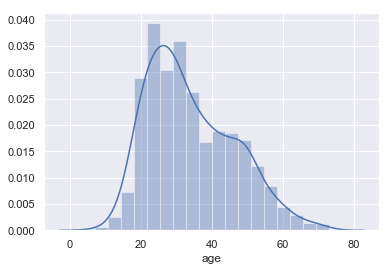

In [156]:
sns.distplot(df_user['age']);

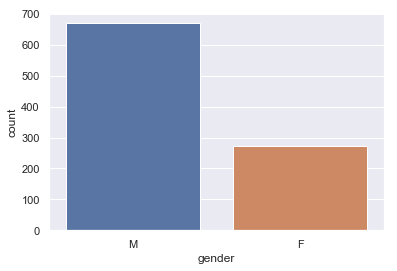

In [157]:
#sns.countplot(df_item_data_user['gender'],hue=df_item_data_user['occupation']);
sns.countplot(df_user['gender']);

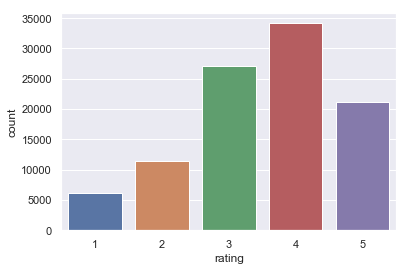

In [158]:
sns.countplot(df_data['rating']);

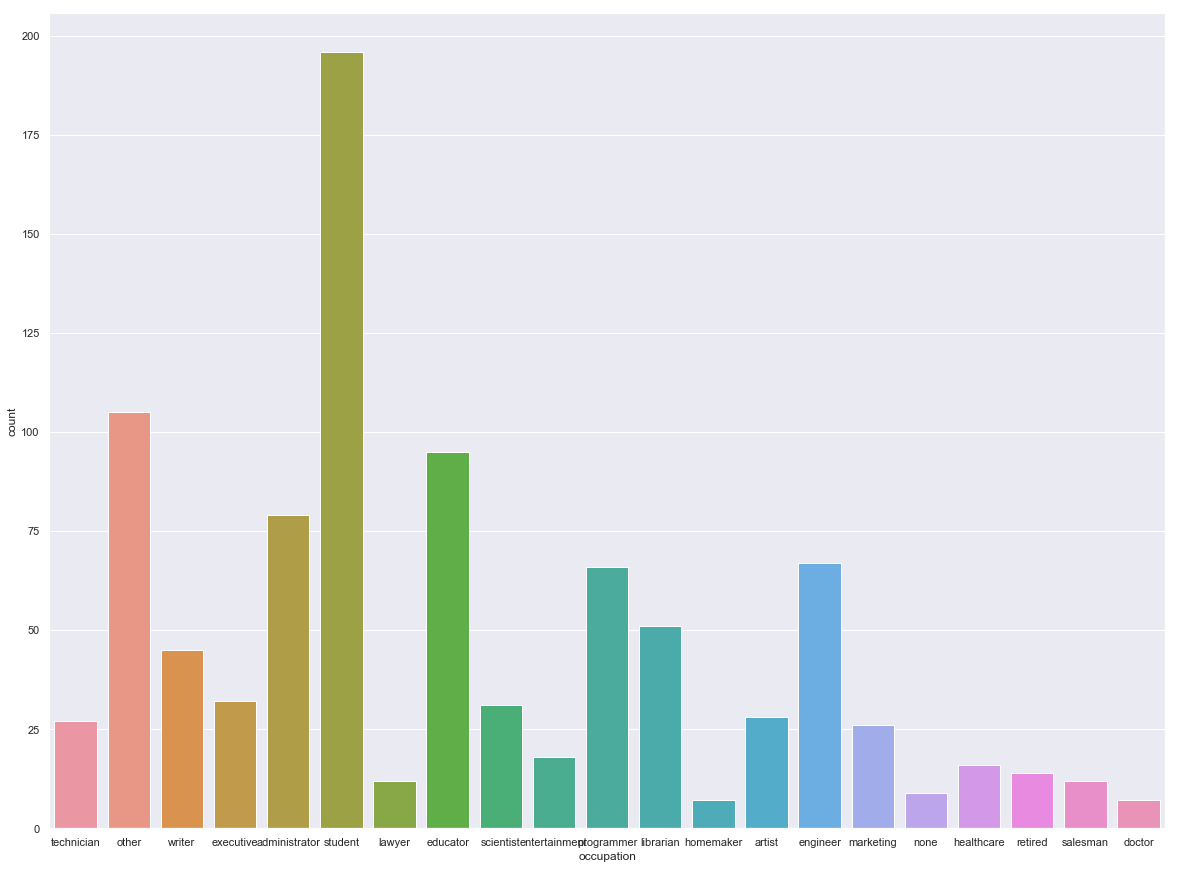

In [162]:
plt.subplots(figsize=(20,15))
sns.countplot(df_user['occupation']);

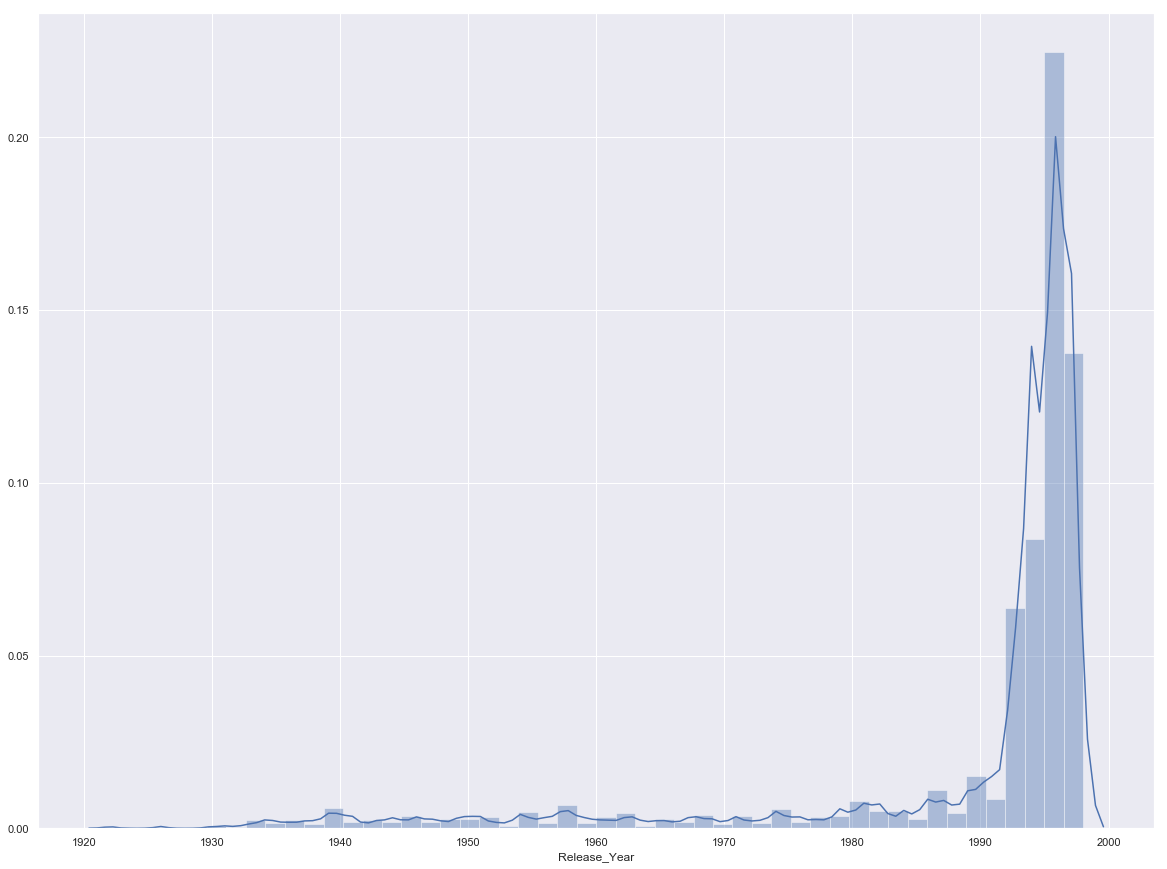

In [163]:
#sns.distplot(df_item['Release_Year']);

#df_item_data_user['gender'].value_counts().plot(kind='bar');
plt.subplots(figsize=(20,15))
sns.distplot(df_item['Release_Year']);

In [139]:
#df_user.head()
#sns.distplot(df_user['age']);

In [140]:
#df_data.head()

### 8. Visualize how popularity of genres has changed over the years - 10 marks

Note that you need to use the number of releases in a year as a parameter of popularity of a genre

Hint 

1: you need to reach to a data frame where the release year is the index and the genre is the column names (one cell shows the number of release in a year in one genre) or vice versa.
Once that is achieved, you can either use univariate plots or can use the heatmap to visualise all the changes over the years 
in one go. 

Hint 2: Use groupby on the relevant column and use sum() on the same to find out the nuumber of releases in a year/genre.  

In [141]:
#Only My Experiment
# Count of movies per year
#a = df_item_data_user.groupby('Release_Year')['movie id'].count().sort_values(ascending=True) # Find the #of releases per year
#a = a.reset_index() # flatten the dataframe 
#a.columns = ['Release_Year' ,'count_of_movies']
#a.head()
#plt.subplots(figsize=(20,15))
#sns.barplot(data= a , x= 'Release_Year' , y ='count_of_movies')

In [142]:
##Only My Experiment
#col_list_1= list(df_item_data_user)                       # Store the column names in a list
#del col_list_1[0:8]                             # Remove the unrequired columns
#del col_list_1[-5]
#print(col_list_1)
#df_item_data_user.groupby('Release_Year')['']

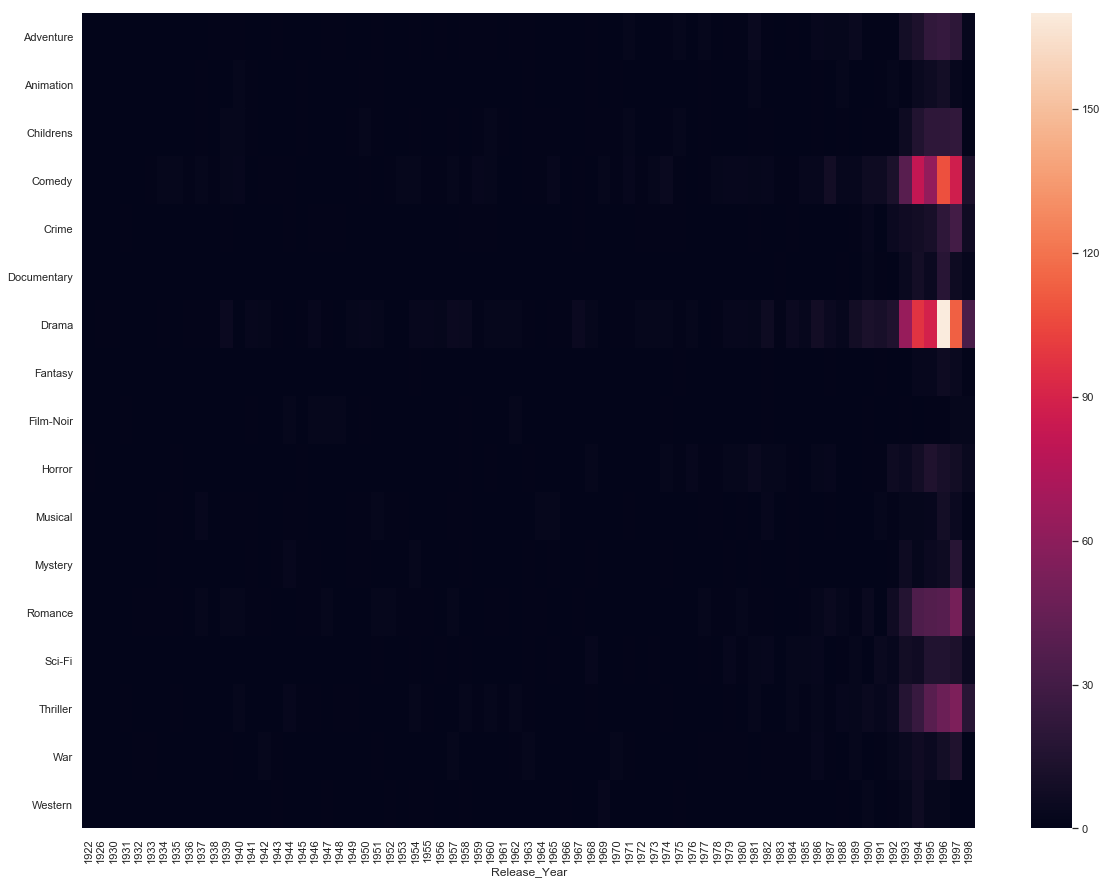

In [155]:
##Answer to the question
b = df_item.groupby('Release_Year')[['Adventure', 'Animation', 'Childrens', 'Comedy', 'Crime', 'Documentary', 'Drama', 'Fantasy', 'Film-Noir', 'Horror', 'Musical', 'Mystery', 'Romance', 'Sci-Fi', 'Thriller', 'War', 'Western']].sum()
c=b.transpose() # interchanging the axis
#b.head()
#b.reset_index(level=0, inplace=True) ###very important: To convert index to column
#b.head()
#b.shape
#b

plt.subplots(figsize=(20,15))
sns.heatmap(c) ###########################Stil to see why the data is not matching


### 9. Find the top 25 movies according to average ratings such that each movie has number of ratings more than 100 - 10 marks

Hint : 
1. First find the movies that have more than 100 ratings(use merge, groupby and count). Extract the movie titles in a list.
2. Find the average rating of all the movies and sort them in the descending order. You will have to use the .merge() function to reach to a data set through which you can get the names and the average rating.
3. Use isin(list obtained from 1) to filter out the movies which have more than 100 ratings.

Note: This question will need you to research about groupby and apply your findings. You can find more on groupby on https://realpython.com/pandas-groupby/.

In [144]:
#your answer here
#d = df_data.groupby('movie id')['rating'].count()
d =df_data.groupby('movie id', as_index=False).agg({"rating": "count"}) ###To have a calculated column and off the index

e=d[d['rating']>100]
# Got the list of movies which have more than 100 ratings
e_list = e['movie id'].tolist() # Converting Dataframe values to a list
#len(e_list)
#e_list

In [145]:
# Group the data frame by movie and extract a number of stats from each group
f= df_data.groupby(
   ['movie id']
).agg(
    {
         'rating':sum,    # Sum duration per group
         'user id': "count",  # get the count of networks
    }
)

# Average Rating
f["Avg Rating"] = f['rating']/f['user id']

###very important: To convert index to column
f.reset_index(level=0, inplace=True) 

#Filter the dataframe rows by column list values
g = f[f['movie id'].isin(e_list)]


#Find the top 25 movies from the above dataframe
h = g.sort_values(by='Avg Rating',ascending=False).head(25)
movie_id_list = h['movie id'].tolist()

# Movie Title list
movie_name_df = df_item[df_item['movie id'].isin(movie_id_list)]
movie_name_list = movie_name_df['movie title'].tolist()
movie_name_list

['Usual Suspects, The ',
 'Star Wars ',
 'Shawshank Redemption, The ',
 'Silence of the Lambs, The ',
 'Godfather, The ',
 'Citizen Kane ',
 'Wrong Trousers, The ',
 'Empire Strikes Back, The ',
 'Raiders of the Lost Ark ',
 '12 Angry Men ',
 'Good Will Hunting ',
 'Secrets & Lies ',
 'Titanic ',
 "Schindler's List ",
 "One Flew Over the Cuckoo's Nest ",
 'Close Shave, A ',
 'To Kill a Mockingbird ',
 'Dr. Strangelove or: How I Learned to Stop Worrying and Love the Bomb ',
 'Vertigo ',
 'North by Northwest ',
 'Casablanca ',
 'Maltese Falcon, The ',
 'Lawrence of Arabia ',
 'Rear Window ',
 'Manchurian Candidate, The ']

### 10. See gender distribution across different genres check for the validity of the below statements - 10 marks

* Men watch more drama than women
* Women watch more Sci-Fi than men
* Men watch more Romance than women


1. There is no need to conduct statistical tests around this. Just compare the percentages and comment on the validity of the above statements.

2. you might want ot use the .sum(), .div() function here.
3. Use number of ratings to validate the numbers. For example, if out of 4000 ratings received by women, 3000 are for drama, we will assume that 75% of the women watch drama.

#### Conclusion:



In [146]:
#list of Drama Movies
DramaList=df_item[df_item['Drama']==1]
Drama_list = DramaList['movie id'].tolist() # Converting Dataframe values to a list
len(Drama_list)

#User for Drama Movies
h = df_data[df_data['movie id'].isin(Drama_list)]

df_data_user_new = pd.merge(h, df_user, on='user id')
df_data_user_new

#sns.countplot(x='gender', hue='user id', data=df_data_user_new)

# The following output suggests that "Men watch more drama than women"
# The given statement is valid
i =df_data_user_new.groupby('gender', as_index=False).agg({"rating": "count"})
i

,gender,rating
0,F,11008
1,M,28887


In [147]:
#list of Sci-Fi Movies
df_item_copy = df_item.copy()
df_item_copy.columns = df_item_copy.columns.str.replace('-', '')
SciFiList=df_item_copy[df_item_copy['SciFi']==1]
SciFi_list = SciFiList['movie id'].tolist() # Converting Dataframe values to a list
len(SciFi_list)

#User for Drama Movies
k = df_data[df_data['movie id'].isin(SciFi_list)]

df_data_user_k = pd.merge(k, df_user, on='user id')
df_data_user_k

#sns.countplot(x='gender', hue='user id', data=df_data_user_new)

# The following output suggests that "Men watch more Sci-Fi than women"
# The given statement is NOT valid
l =df_data_user_k.groupby('gender', as_index=False).agg({"rating": "count"})
l


,gender,rating
0,F,2629
1,M,10101


In [148]:
#list of Sci-Fi Movies
RomanceList=df_item[df_item['Romance']==1]
Romance_list = RomanceList['movie id'].tolist() # Converting Dataframe values to a list
len(Romance_list)

#User for Drama Movies
m = df_data[df_data['movie id'].isin(Romance_list)]

df_data_user_m = pd.merge(m, df_user, on='user id')
df_data_user_m

#sns.countplot(x='gender', hue='user id', data=df_data_user_new)

# The following output suggests that "Men watch more Romance than women"
# The given statement is valid
n =df_data_user_m.groupby('gender', as_index=False).agg({"rating": "count"})
n

,gender,rating
0,F,5858
1,M,13603
